# <img src="https://codehs.com/uploads/621e93dcea42ef17cb8c48aaceef5b90" width="150"> Natural Language Processing with Supervised Data


Before getting started, make sure you set the Runtime type to **T4 GPU** if it is not already. Do this by selecting the *Change Runtime Type* option under the *Runtime* menu above.

Using a runtime with a GPU will significantly improve the runtime performance for this Colab. As models get more complex, the runtime increases significantly.

### Watch The Video For This Section

Click Watch on YouTube to expand.

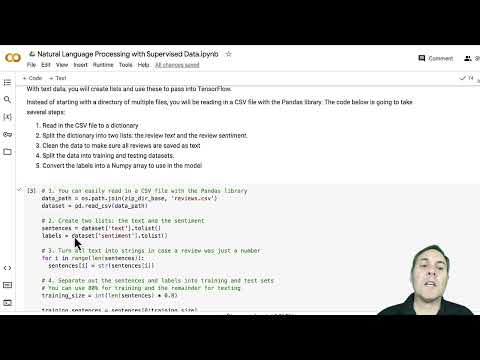

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('UcgsMrhEQe8')

##Background

In a previous exercise, you saw how you could tokenize text to prepare it for modeling in a Natural Language Processing (NLP) model. In this exercise, you are going to apply this to a **supervised** model to predict whether a review is positive or negative based on the text.

A **supervised** model is a model that uses labels to train the data. The models you have created so far have been supervised models because you take an image with a classification label and feed it into the model. The program then uses this to learn and make additional predictions.

In this activity, you will do something similar. You will feed in a text and tell the model whether this text is positive or negative. The model will use that to learn to predict whether a new text is positive or negative.

## <img src="https://codehs.com/uploads/dc8d8e3a41aa5f3226b3a5a0e883108b" width="50"> Setup code

This code is similar to other. One addition here is that you will use the Pandas library for some data processing and we will not be plotting accuracy charts as the model accuracy here will be relatively high for both model and validation data.

The data you will be using to build your model are actual Starbuck reviews. Each review was rated out of 5 stars. The 1 and 2 star reviews were used to create negative sentiment reviews and the 4 and 5 start reviews were used to create the positive sentiment reviews. 3 star reviews are a little less conclusive, so they were left out.

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


_URL = 'https://codehs.com/uploads/4866571ff2d08b3927aad5c48f466a96'
zip_dir = tf.keras.utils.get_file('reviews.csv', origin=_URL, extract=True)

zip_dir_base = os.path.dirname(zip_dir)
print(zip_dir_base)

## <img src="https://codehs.com/uploads/dc8d8e3a41aa5f3226b3a5a0e883108b" width="50"> Import and split data

When looking at image data, you would pass TensorFlow a directory with images and the image generator would feed them into the model. With text data, you will create lists and use these to pass into TensorFlow.

Instead of starting with a directory of multiple files, you will be reading in a CSV file with the Pandas library. The code below is going to take several steps:

1. Read in the CSV file to a dictionary
2. Split the dictionary into two lists: the review *text* and the review *sentiment*.
3. Clean the data to make sure all reviews are saved as text
4. Split the data into training and testing datasets.
5. Convert the labels into a Numpy array to use in the model

In [ ]:
# 1. You can easily read in a CSV file with the Pandas library
data_path = os.path.join(zip_dir_base, 'reviews.csv')
dataset = pd.read_csv(data_path)

# 2. Create two lists: the text and the sentiment
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

# 3. Turn all text into strings in case a review was just a number
for i in range(len(sentences)):
  sentences[i] = str(sentences[i])

# 4. Separate out the sentences and labels into training and test sets
# You can use 80% for training and the remainder for texting
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# 5. Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

# Print the length of the testing and training datasets
print("Training Size: " + str(len(training_sentences)))
print("Testing Size: " + str(len(testing_sentences)))

## <img src="https://codehs.com/uploads/dc8d8e3a41aa5f3226b3a5a0e883108b" width="50"> Tokenize the data


As you saw in the previous lab, tokenizing the text is a three-step process of transforming words into numbers (`Tokenizer`), creating sequences of numbers from the tokens (`text_to_sequence`), and padding making each the same length (`pad_sequences`).


You will notice that this code uses variables defined at the top to populate the tokenizing parameters. This helps make it easy to read, but more importantly, we will be using some of these values in the model.


Here is a recap of the parameters you will be using:


**vocab_size**: The number of words in the model. When fitting the data the `fit_to_text` will use the most common 1000 words and then use the OOV token for any additional words.


**max_length**: The maximum number of words/tokens in each sequence.


**padding_type**: For sequences less than the max, post tells it to add padding to the end of the sequence.


**trunc_type**: For sequences longer than the max, post tells it to truncate at the end of the sequence.


Notice that the testing data is also converted and padded, but it is not used to fit the data to the tokenizer.

In [ ]:
vocab_size = 1000
max_length = 100
padding_type = "post"
trunc_type = "post"

# Create the tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token="<OOV>")
# Fit the training sentences to the tokenizer
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Convert the sentences to sequences using the tokenizer
sequences = tokenizer.texts_to_sequences(training_sentences)

# Pad the sequences
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert and pad the test sentences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

## <img src="https://codehs.com/uploads/dc8d8e3a41aa5f3226b3a5a0e883108b" width="50"> Review a Sentence


Let's take a look at the data before it is fed into the model. This will print the sentiment, review text, and the padded sequence. Check it out.


Remember that the sentiment will be 1 for a positive review and 0 for a negative review.


In the sequences, look for a 0 for padding and a 1 for an OOV token. Remember, the vocabulary was 1000, but you will still find some words that are OOV.

In [ ]:
for i in range(5):
  print("Sentiment: " + str(labels[i]))
  print(sentences[i])
  print(padded[i])
  print()

### Watch The Video For This Section

Click Watch on YouTube to expand.

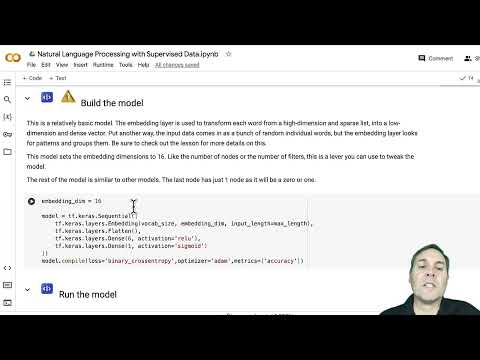

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('F5PQsSJd2p8')

## <img src="https://codehs.com/uploads/dc8d8e3a41aa5f3226b3a5a0e883108b" width="50"> <img src="https://codehs.com/uploads/b3ed72f9d4f6fced3550163f4b1617de" width="50"> Build the model

This is a relatively basic model. The embedding layer is used to transform each word from a high-dimension and sparse list, into a low-dimension and dense vector. Put another way, the input data comes in as a bunch of random individual words, but the embedding layer looks for patterns and groups them. Be sure to check out the lesson for more details on this.

This model sets the embedding dimensions to 16. Like the number of nodes or the number of filters, this is a lever you can use to tweak the model.

The rest of the model is similar to other models. The last node has just 1 node as it will be a zero or one.

In [ ]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## <img src="https://codehs.com/uploads/dc8d8e3a41aa5f3226b3a5a0e883108b" width="50"> Run the model


It's time to run the model. This is very similar to the other `fit` commands, but there are a few things to note:


* The results are not being saved in a `history` variable because we are not going to graph the results. As the model runs, you will be able to see the accuracy and validation accuracy. You should note they are relatively high.


* We need to feed both the text and the labels. You can see this as the first two parameters in the command and also in the validation data.


* We only need to run 10 epochs to get decent results.

In [ ]:
num_epochs = 10
model.fit(padded,
          training_labels_final,
          epochs=num_epochs,
          validation_data=(testing_padded, testing_labels_final))

### Watch The Video For This Section

Click Watch on YouTube to expand.

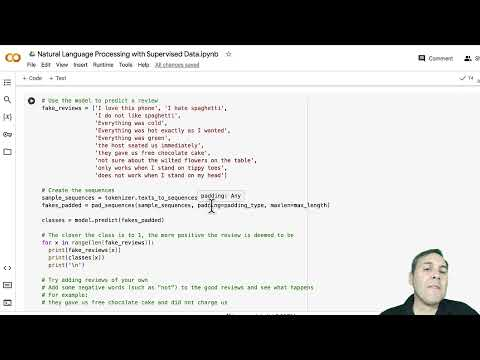

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('_hYCI3vGgxc')

As you can see, the model accuracy is pretty high, but let's see how that translates to actual results.


Below is a list of fake reviews. Feel free to add to it, but leave the existing reviews there for now.


To feed these into the model, you still need to tokenize and pad them, then you can feed them into the model using the `predict` command.


The results will be a decimal number between 0 and 1. The closer to 1, the more positive the model forecasts the review to be.


Run the model and see if anything stands out.

In [ ]:
# Use the model to predict a review
fake_reviews = ['I love this phone', 'I hate spaghetti',
                'I do not like spaghetti',
                'Everything was cold',
                'Everything was hot exactly as I wanted',
                'Everything was green',
                'the host seated us immediately',
                'they gave us free chocolate cake',
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes',
                'does not work when I stand on my head']

# Create the sequences
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us


Does anything surprise you? Why do you think the model thinks that `I hate spaghetti` is positive, yet `I do not like spaghetti` is negative?

Here is a bit of code that might help you answer that question.

In [ ]:
print(fake_reviews[1])
print(fakes_padded[1])

print(fake_reviews[2])
print(fakes_padded[2])

## <img src="https://codehs.com/uploads/91c1007825668faf96413e19a3693bcf" width="50"> Tweaks To The Model

Now it is your turn to make tweaks to the model. Try making these changes to the model:

* Set the vocabulary size to 1500
* Set the max length to 50
* Set the embedding dim to 32
* Run for 30 epochs


In [ ]:
vocab_size = ??
max_length = ??
embedding_dim = ??
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
num_epochs = ??

tokenizer = Tokenizer(num_words = vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

sequences = tokenizer.texts_to_sequences(training_sentences)

padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(padded,
          training_labels_final,
          epochs=num_epochs,
          validation_data=(testing_padded, testing_labels_final))

## <img src="https://codehs.com/uploads/dc8d8e3a41aa5f3226b3a5a0e883108b" width="50"> View Model Results

You do not need to alter this code. This will display the results of the data augmentation model.

In [ ]:
fake_reviews = ['I love this phone', 'I hate spaghetti',
                'I do not like spaghetti',
                'Everything was cold',
                'Everything was hot exactly as I wanted',
                'Everything was green',
                'the host seated us immediately',
                'they gave us free chocolate cake',
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes',
                'does not work when I stand on my head']

sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print()

## <img src="https://codehs.com/uploads/92cc42365dc1b9ad4a78334f63a60367" width="50"> Questions To Answer on CodeHS


1. In what ways is the NLP model similar to other models you have worked on?


2. In what ways is the model different from other models you have worked on?


3. In your own words, describe what the embedding layer is doing in the NLP model.


4. After looking at the results from the first model, speculate as to why "I hate spaghetti" was considered positive, but "I do not like spaghetti" was considered negative. What did printing out the sequence tell you?


5. How did the model tweaks change the results? There are a few small, but noticeable differences. Speculate as to why.